In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Wczytanie danych - plik csv
df = pd.read_csv('water_potability.csv')
# Dane pobrane z: https://www.kaggle.com/datasets/adityakadiwal/water-potability

In [3]:
# Rzut okiem na dane
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
# Mamy 10 kolumn - typ liczowy. Ramka posiada wartości odstające, które usuwamy

In [7]:
df = df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


In [9]:
# Teraz nie mamy już wartości odstających. 

In [10]:
# Sprawdźmy bilnas klas. Zmienna przewidywana to Potability, które zgodnie z opisem:
# Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

In [12]:
df['Potability'].value_counts()

0    1200
1     811
Name: Potability, dtype: int64

In [13]:
# Klasy są zbilansowane

In [14]:
# Dzielimy dane na uczące i testowe (0.75 - 0.25)

In [16]:
X = df.drop(columns= ['Potability'])

In [17]:
Y = df['Potability']

In [18]:
# Import skaleera oraz funkcji dzielącej dane
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state=1) 

In [20]:
# Skalowanie danych

In [22]:
minMax = MinMaxScaler()
x_train_scaled = minMax.fit_transform(x_train)
x_test_scaled = minMax.transform(x_test)

In [23]:
# Sieć neuronowa

In [118]:
import tensorflow as tf
# Warstwa wejściowa
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10, activation='relu', input_shape=(x_train_scaled.shape[1], )))
# Dwie ukryte warstwy
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='relu'))
# Wyjście
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [119]:
# Trening
history = model.fit(x_train_scaled, y_train, validation_data=(x_test_scaled, y_test), epochs=100, verbose=1)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
 1/48 [..............................] - ETA: 20s - loss: 0.7879 - accuracy: 0.3125WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000026F1943A4C8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`

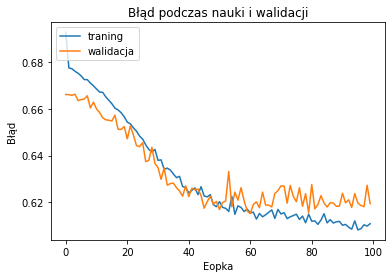

In [120]:
# Wykres błędów
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Błąd podczas nauki i walidacji')
plt.ylabel('Błąd')
plt.xlabel('Eopka')
plt.legend(['traning', 'walidacja'], loc='upper left')

In [121]:
# Dokonajmy predukcji

In [122]:
# DANE TRENINGOWE

In [123]:
pred_train = model.predict(x_train_scaled)
pred_class = [round(m[0]) for m in pred_train]

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [124]:
from sklearn.metrics import classification_report, confusion_matrix

In [125]:
# Macierz pomyłek

In [126]:
cf_matrix_train = confusion_matrix(y_train, pred_class)

In [127]:
y_train.value_counts()

0    891
1    617
Name: Potability, dtype: int64

In [128]:
cf_matrix_train

array([[768, 123],
       [350, 267]], dtype=int64)

In [129]:
tn_train, fp_train, fn_train, tp_train = cf_matrix_train.ravel()

In [130]:
tn_train

768

In [131]:
fp_train

123

In [132]:
fn_train

350

In [133]:
tp_train

267

In [134]:
# Raport z klasyfikacji

In [135]:
print(classification_report(y_train, pred_class))

              precision    recall  f1-score   support

           0       0.69      0.86      0.76       891
           1       0.68      0.43      0.53       617

    accuracy                           0.69      1508
   macro avg       0.69      0.65      0.65      1508
weighted avg       0.69      0.69      0.67      1508



In [138]:
# DANE TESTOWE
pred_test = model.predict(x_test_scaled)
pred_class_test = [round(m[0]) for m in pred_test]

In [139]:
cf_matrix_test = confusion_matrix(y_test, pred_class_test)

In [140]:
y_test.value_counts()

0    309
1    194
Name: Potability, dtype: int64

In [141]:
cf_matrix_test

array([[259,  50],
       [112,  82]], dtype=int64)

In [142]:
tn_test, fp_test, fn_test, tp_test = cf_matrix_test.ravel()

In [144]:
tn_test

259

In [145]:
fp_test

50

In [146]:
fn_test

112

In [147]:
tp_test

82

In [ ]:
# Raport z klasyfikacji

In [148]:
print(classification_report(y_test, pred_class_test))

              precision    recall  f1-score   support

           0       0.70      0.84      0.76       309
           1       0.62      0.42      0.50       194

    accuracy                           0.68       503
   macro avg       0.66      0.63      0.63       503
weighted avg       0.67      0.68      0.66       503

